**Table of contents**<a id='toc0_'></a>    
- [Loading dI/dV map](#toc1_)    
- [Fitting to peaks](#toc2_)    
- [hvplot](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import sys
sys.path.append('./test')
sys.path.insert(0, './')
import rhkpy

import matplotlib.pyplot as pl
import numpy as np
import xarray as xr

# <a id='toc1_'></a>[Loading dI/dV map](#toc0_)

In [2]:
filename_map = './test/dI-dV_ABC_Graphite-Sample5_9K_2021_08_24_11_54_33_632.sm4'
specmap = rhkpy.rhkdata(filename_map)

We can do a "quick plot" of the data, by simply using the method: `rhkdata.qplot()`.

In [15]:
specmap.qplot()

Row
    [0] HoloViews(Image, sizing_mode='fixed')
    [1] Column
        [0] HoloViews(DynamicMap, sizing_mode='fixed')
        [1] WidgetBox(align=('end', 'start'))
            [0] DiscreteSlider(margin=(20, 20, 20, 20), name='bias', options=OrderedDict([('-0.5', ...]), value=-0.5000000474974513, width=250)

There are two xarray Datasets in the file: `image` and `spectra`.
One can access these using the dot `.` notation

In [3]:
specmap.image

<xarray.Dataset>
Dimensions:     (y: 512, x: 512, scandir: 2)
Coordinates:
  * x           (x) float64 0.0 0.1953 0.3906 0.5859 ... 99.22 99.41 99.61 99.8
  * y           (y) float64 0.0 0.1953 0.3906 0.5859 ... 99.22 99.41 99.61 99.8
  * scandir     (scandir) <U8 'forward' 'backward'
Data variables:
    topography  (y, x, scandir) float64 0.1275 0.8637 0.1496 ... 0.2044 -0.06225
    current     (y, x, scandir) float64 103.4 103.3 98.97 ... 94.64 100.3 102.0
    lia         (y, x, scandir) float64 -0.1378 -0.02259 ... -0.1451 0.2644
Attributes: (12/18)
    filename:          dI-dV_ABC_Graphite-Sample5_9K_2021_08_24_11_54_33_632.sm4
    xoffset:           -563.5723326555265
    yoffset:           -828.9023483917802
    xoffset_units:     nm
    yoffset_units:     nm
    size_x:            100.0
    ...                ...
    setpoint units:    pA
    measurement date:  08/23/21
    measurement time:  19:46:50
    scan angle:        0.0
    datatype:          map
    spectype:          iv

Both the `spectra` and `image` have attributes, which can be accessed like so:

In [4]:
specmap.image.attrs

{'filename': 'dI-dV_ABC_Graphite-Sample5_9K_2021_08_24_11_54_33_632.sm4',
 'xoffset': -563.5723326555265,
 'yoffset': -828.9023483917802,
 'xoffset_units': 'nm',
 'yoffset_units': 'nm',
 'size_x': 100.0,
 'size_y': 100.0,
 'size_x units': 'nm',
 'size_y units': 'nm',
 'bias': 0.5,
 'bias units': 'V',
 'setpoint': 100.0000013351432,
 'setpoint units': 'pA',
 'measurement date': '08/23/21',
 'measurement time': '19:46:50',
 'scan angle': 0.0,
 'datatype': 'map',
 'spectype': 'iv'}

`image` has data variables: 'topography', 'current' and 'lia'. It has coordinates: 'x', 'y', 'scandir'

Plotting the topography data, we select the `forward` scan direction. This can be done using the `isel` function

In [5]:
fwscan = specmap.image.sel(scandir = 'forward')

Now we can see that the coordinate `scandir` is gone, leaving only `x` and `y`

In [6]:
fwscan

<xarray.Dataset>
Dimensions:     (y: 512, x: 512)
Coordinates:
  * x           (x) float64 0.0 0.1953 0.3906 0.5859 ... 99.22 99.41 99.61 99.8
  * y           (y) float64 0.0 0.1953 0.3906 0.5859 ... 99.22 99.41 99.61 99.8
    scandir     <U8 'forward'
Data variables:
    topography  (y, x) float64 0.1275 0.1496 0.1561 ... 0.1625 0.2449 0.2044
    current     (y, x) float64 103.4 98.97 99.51 100.9 ... 95.3 96.94 100.3
    lia         (y, x) float64 -0.1378 0.2831 -0.002617 ... 0.353 0.412 -0.1451
Attributes: (12/18)
    filename:          dI-dV_ABC_Graphite-Sample5_9K_2021_08_24_11_54_33_632.sm4
    xoffset:           -563.5723326555265
    yoffset:           -828.9023483917802
    xoffset_units:     nm
    yoffset_units:     nm
    size_x:            100.0
    ...                ...
    setpoint units:    pA
    measurement date:  08/23/21
    measurement time:  19:46:50
    scan angle:        0.0
    datatype:          map
    spectype:          iv

Selecting the 'topography' DataArray from the set. This has coordinates 'x' and 'y' and values as a numpy array, which can be accessed by `fwscan['topography'].data`

In [7]:
fwscan['topography']

<xarray.DataArray 'topography' (y: 512, x: 512)>
array([[0.12745095, 0.14958378, 0.15613675, ..., 0.76059381, 0.77796111,
        0.70360698],
       [0.04591631, 0.06281484, 0.09943181, ..., 0.7283744 , 0.68185175,
        0.65154082],
       [0.03366201, 0.04948678, 0.10051485, ..., 0.69048426, 0.66453495,
        0.68708921],
       ...,
       [0.55369809, 0.56422779, 0.57597385, ..., 0.57906865, 0.60411274,
        0.55260071],
       [0.41874138, 0.48756744, 0.48963478, ..., 0.47691923, 0.41566248,
        0.3938875 ],
       [0.35769908, 0.45449572, 0.54410473, ..., 0.16250469, 0.24487125,
        0.20442301]])
Coordinates:
  * x        (x) float64 0.0 0.1953 0.3906 0.5859 ... 99.22 99.41 99.61 99.8
  * y        (y) float64 0.0 0.1953 0.3906 0.5859 ... 99.22 99.41 99.61 99.8
    scandir  <U8 'forward'
Attributes:
    units:       nm
    long units:  nanometer

In [94]:
fwscan['topography'].data

array([[ 0.22277586,  0.31985992,  0.40975636, ...,  0.1738827 ,
         0.25653668,  0.21637588],
       [ 0.42118773,  0.49016015,  0.49237385, ...,  0.55386099,
         0.4927506 ,  0.47112197],
       [ 0.66517782,  0.67569847,  0.68743548, ...,  0.68594219,
         0.71097722,  0.65945614],
       ...,
       [-0.04212871, -0.02539763,  0.02653675, ...,  1.07600668,
         1.05096369,  1.07442425],
       [-0.1272415 , -0.10926353, -0.07156714, ...,  1.10464527,
         1.05920205,  1.02997055],
       [ 0.05461745,  0.07771955,  0.08524178, ...,  1.18111791,
         1.19945448,  1.12606963]])

The coordinates in the Dataset are accessed by `.coords`, for example in the 'x' direction: `fwscan.coords['x']`. The values can be directly acessed as: `fwscan.coords['x'].data`

In [10]:
fwscan.coords['x']
# the above is equivalent to: `fwscan.x`

<xarray.DataArray 'x' (x: 512)>
array([ 0.      ,  0.195313,  0.390625, ..., 99.414064, 99.609376, 99.804689])
Coordinates:
  * x        (x) float64 0.0 0.1953 0.3906 0.5859 ... 99.22 99.41 99.61 99.8
    scandir  <U8 'forward'
Attributes:
    units:       nm
    long units:  nanometer
    note:        fast scan direction\n

Plotting the 'topography' DataArray. When plotting the 'topography' the data has been plane and line fitted.

The coordinates `x` and `y` are in the absolute tip positions

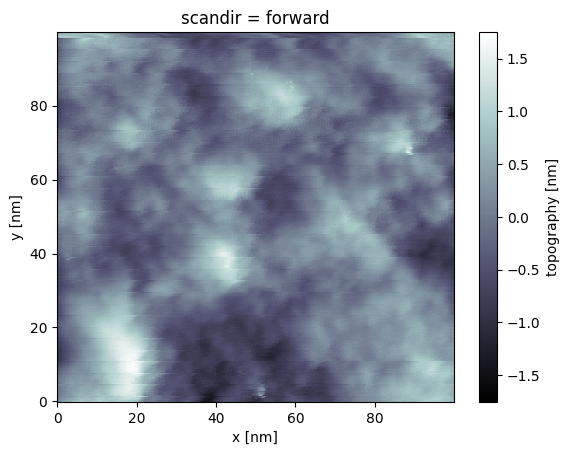

In [11]:
fwscan['topography'].plot(cmap = 'bone')

Let's see the spectra Dataset

In [12]:
specmap.spectra

<xarray.Dataset>
Dimensions:      (bias: 501, specpos_y: 32, specpos_x: 32, repetitions: 1,
                  biasscandir: 2)
Coordinates:
  * bias         (bias) float64 0.5 0.498 0.496 0.494 ... -0.496 -0.498 -0.5
  * specpos_x    (specpos_x) float64 -465.3 -468.5 -471.6 ... -559.1 -562.2
  * specpos_y    (specpos_y) float64 -730.7 -733.8 -736.9 ... -824.4 -827.5
  * repetitions  (repetitions) int32 0
  * biasscandir  (biasscandir) <U5 'left' 'right'
Data variables:
    lia          (bias, specpos_y, specpos_x, repetitions, biasscandir) float64 ...
    current      (bias, specpos_y, specpos_x, repetitions, biasscandir) float64 ...
    x            (specpos_y, specpos_x) float64 -465.3 -468.5 ... -559.1 -562.2
    y            (specpos_y, specpos_x) float64 -730.7 -730.7 ... -827.5 -827.5
Attributes: (12/15)
    filename:           dI-dV_ABC_Graphite-Sample5_9K_2021_08_24_11_54_33_632...
    bias:               0.5
    bias units:         V
    setpoint:           100.0000013351432
    setpoint units:     pA
    measurement date:   08/23/21
    ...                 ...
    LI amplitude unit:  mV
    LI frequency:       1250.0
    LI frequency unit:  Hz
    LI phase:           -102.9999998
    datatype:           map
    spectype:           iv

Plotting the $dI/dV$ spectra.

We can use the `sel` function for this, by specifying the coordinates in nm. Finally selecting the 'lia' data variable to plot as a function of the `bias` coordinate.
To do this we first select the one value in repetitions coordinate, because there are only two spectra (left and right bias scan) at each tip position.
We also can use the `isel` and `sel` functions together.

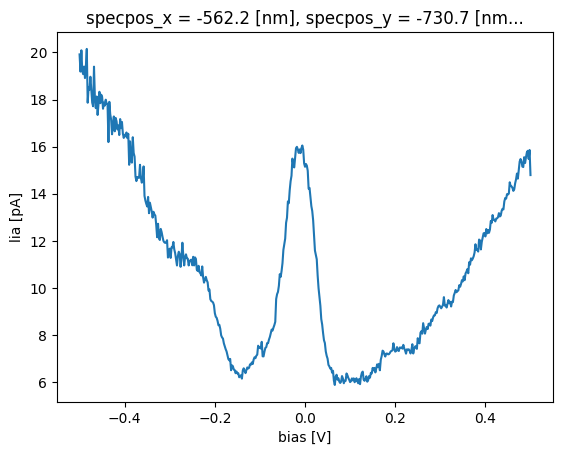

In [13]:
specmap2 = specmap.spectra.isel(repetitions=0)
specmap2.sel(biasscandir = 'left').sel(specpos_x=-782, specpos_y=-521, method='nearest')['lia'].plot()

Plot both the current and Lock-In

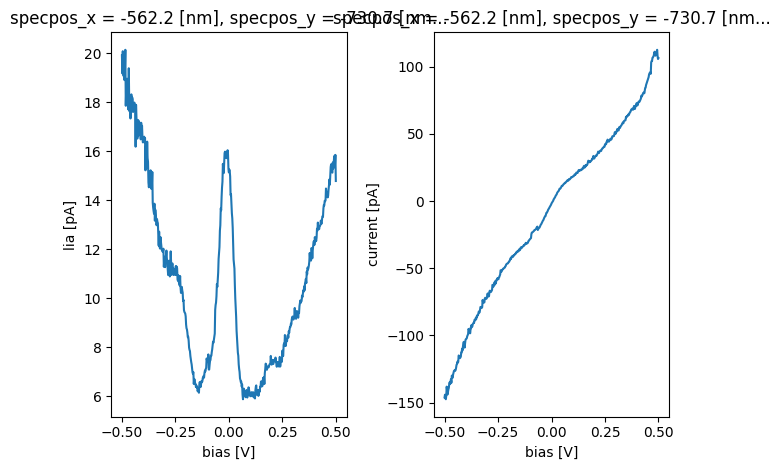

In [14]:
fig, (ax1, ax2) = pl.subplots(1, 2)
specmap2.isel(biasscandir=0).sel(specpos_x=-782, specpos_y=-521, method='nearest')['lia'].plot(ax=ax1)
specmap2.isel(biasscandir=0).sel(specpos_x=-782, specpos_y=-521, method='nearest')['current'].plot(ax=ax2)
pl.tight_layout()

Plot the $dI/dV$ value at zero bias.

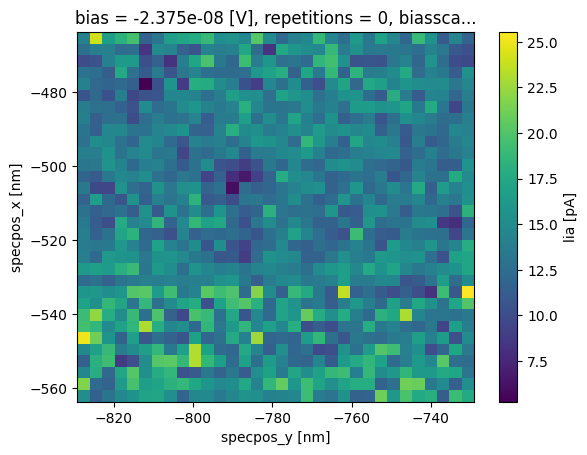

In [5]:
specmap.spectra.isel(repetitions=0, biasscandir=0).sel(bias=0, method='nearest')['lia'].plot()

Average over the forward and backward directions of the bias sweep

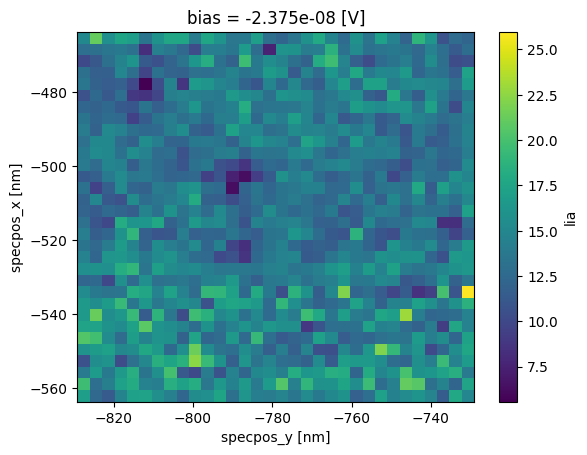

In [101]:
specmap.spectra.mean(dim=['repetitions', 'biasscandir']).sel(bias=0, method='nearest')['lia'].plot()

Let's do something more fancy, like plotting spectra across a line, parallel to the 'y' axis at 'x'=-542 nm

In [102]:
specmap_avg = specmap.spectra.mean(dim=['repetitions', 'biasscandir'])

In [103]:
spec_along_line = specmap_avg.sel(specpos_x=-542, method='nearest')

The selected data now has coordinates of `bias` and `specpos_y`. 

In [104]:
spec_along_line

<xarray.Dataset>
Dimensions:    (bias: 501, specpos_y: 32)
Coordinates:
  * bias       (bias) float64 0.5 0.498 0.496 0.494 ... -0.496 -0.498 -0.5
    specpos_x  float64 -543.5
  * specpos_y  (specpos_y) float64 -730.7 -733.8 -736.9 ... -821.3 -824.4 -827.5
Data variables:
    lia        (bias, specpos_y) float64 18.12 19.5 15.82 ... 17.33 16.82 15.61
    current    (bias, specpos_y) float64 122.6 130.2 95.7 ... -136.6 -129.6
    x          (specpos_y) float64 -465.3 -468.5 -471.6 ... -556.0 -559.1 -562.2
    y          (specpos_y) float64 -808.8 -808.8 -808.8 ... -808.8 -808.8 -808.8

We can plot this on a density plot.

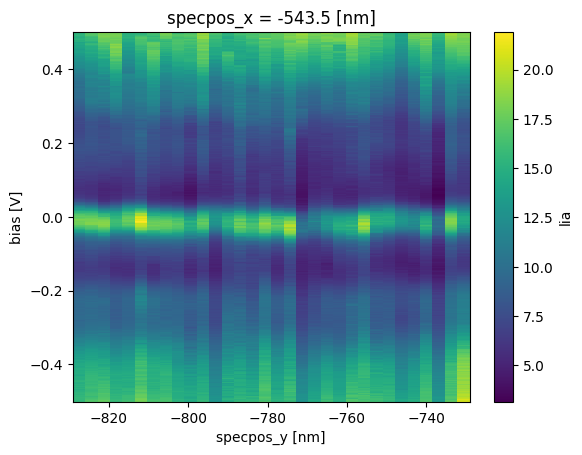

In [105]:
spec_along_line['lia'].plot()

# <a id='toc2_'></a>[Fitting to peaks](#toc0_)

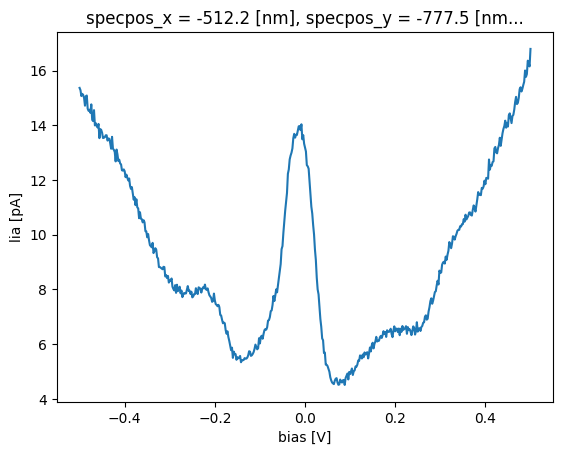

In [106]:
# Let's select out the `biasscandir` and `repetitions` coordinate.
# finally, we will use "numpy-like" notation (this is also a possibility) to select out the 15th specpos in both x and y
single_spec = specmap.spectra.sel(biasscandir = 'left', repetitions = 0)['lia'][:, 15, 15]
single_spec.plot()

Let's fit a Gaussian to this.
Notice, we also slice into the vicinity of the peak.

Values of starting parameters: 
 {'x0': 0, 'ampl': 6, 'width': 0.1, 'offset': 0} 

Values of fitted parameters:

x0 : -0.02
ampl : 8.85
width : 0.05
offset : 5.28


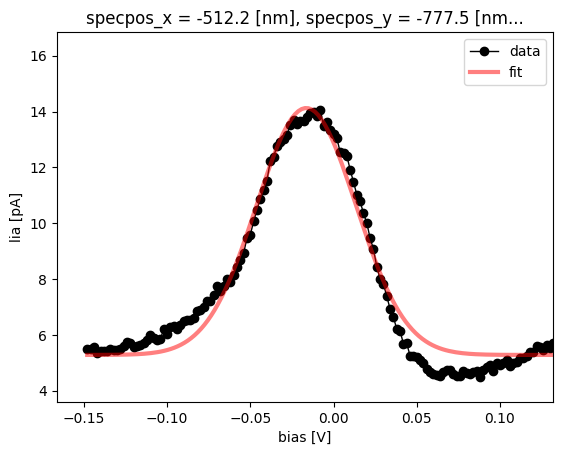

In [107]:
fit = rhkpy.peakfit(single_spec.sel(bias = slice(0.15, -0.15)), stval = {'x0': 0, 'ampl': 6}, toplot = True)

The fit results are returned in a `Dataset`, called `fit` in this case.

In [108]:
fit

<xarray.Dataset>
Dimensions:                (param: 4, cov_i: 4, cov_j: 4)
Coordinates:
    specpos_x              float64 -512.2
    specpos_y              float64 -777.5
    repetitions            int32 0
    biasscandir            <U5 'left'
  * param                  (param) <U6 'x0' 'ampl' 'width' 'offset'
  * cov_i                  (cov_i) <U6 'x0' 'ampl' 'width' 'offset'
  * cov_j                  (cov_j) <U6 'x0' 'ampl' 'width' 'offset'
Data variables:
    curvefit_coefficients  (param) float64 -0.01638 8.846 0.04969 5.282
    curvefit_covariance    (cov_i, cov_j) float64 2.306e-07 ... 0.003792
Attributes:
    units:           pA
    long units:      picoampere
    bias:            0.5
    bias units:      V
    setpoint:        100.0000013351432
    setpoint units:  pA
    time_per_point:  1e-04

In [109]:
# getting the fit coefficients
fit['curvefit_coefficients']

<xarray.DataArray 'curvefit_coefficients' (param: 4)>
array([-0.01637595,  8.84645884,  0.04968808,  5.28201386])
Coordinates:
    specpos_x    float64 -512.2
    specpos_y    float64 -777.5
    repetitions  int32 0
    biasscandir  <U5 'left'
  * param        (param) <U6 'x0' 'ampl' 'width' 'offset'

Let's get the lock-in values from the map and take the average of the forward and backward bias scans.

In [7]:
specmap_tofit = specmap.spectra.mean(dim = ['biasscandir', 'repetitions'])['lia']

Values of starting parameters: 
 {'x0': 0, 'ampl': 10, 'offset': 5, 'width': 0.1} 

Values of fitted parameters:

x0 : -0.02
ampl : 10.15
width : 0.05
offset : 5.41


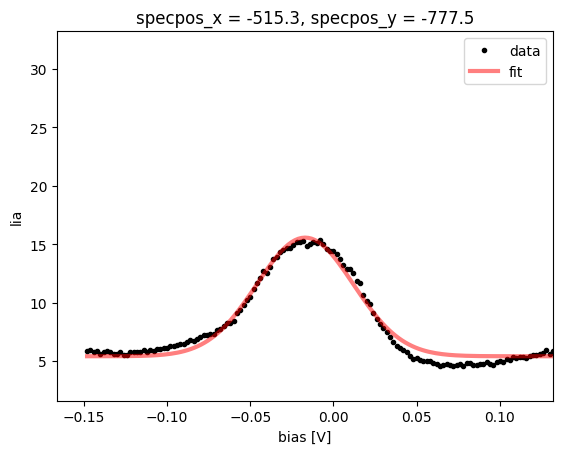

In [8]:
fit_map = rhkpy.peakfit(specmap_tofit.sel(bias = slice(0.15, -0.15)), stval = {'x0': 0, 'ampl': 10, 'offset': 5}, toplot = True)

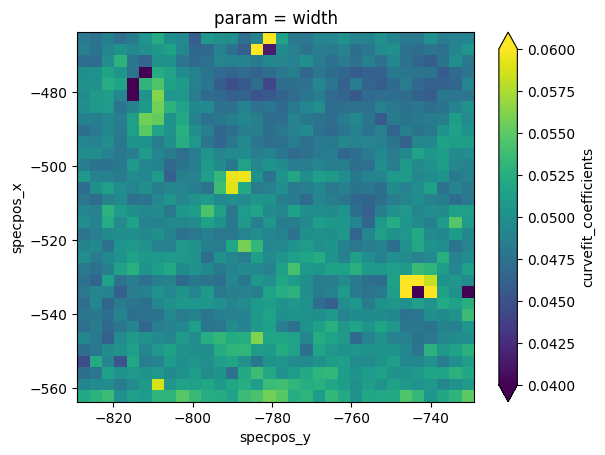

In [9]:
# Plotting the width of the peak in the map
fit_map['curvefit_coefficients'].sel(param = 'width').plot(vmin = 0.04, vmax = 0.06)

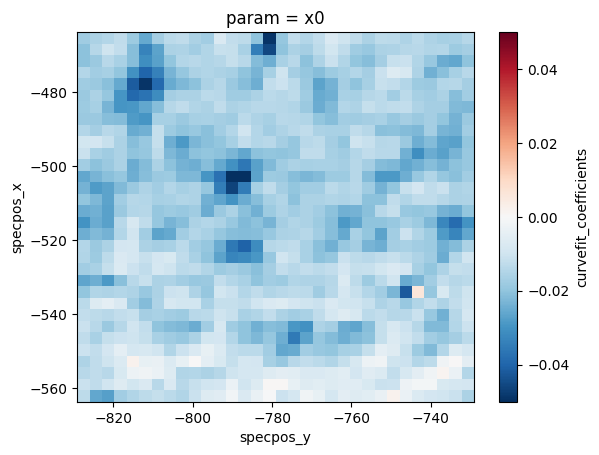

In [13]:
# plotting the position of the peak
fit_map['curvefit_coefficients'].sel(param = 'x0').plot()

Coordinates to absolute values

In [11]:
specmap_abs = rhkpy.coord_to_absolute(specmap.image)

newlengths: 100.00000116860974 100.00000116860974
49.80468808202243 49.80468808202242


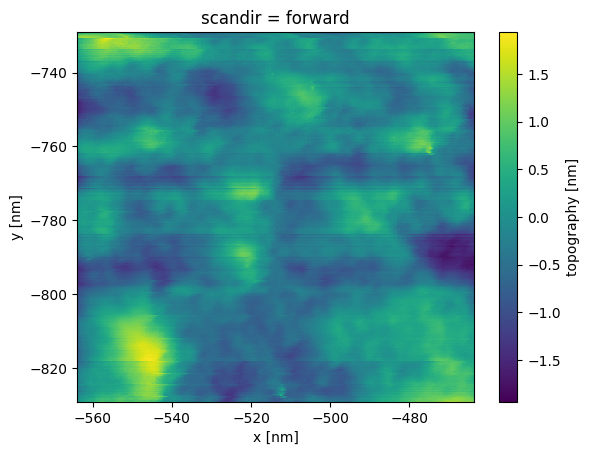

In [17]:
specmap_abs.topography[:, :, 0].plot(cmap = 'viridis')

# <a id='toc3_'></a>[hvplot](#toc0_)

Set default values for the plots

In [10]:
rhkpy.conf_hvplot_defaults()

Let's do the same plot as above but with `hvplot()`

In [27]:
img = fit_map['curvefit_coefficients'].sel(param = 'x0').hvplot.image()
hist = fit_map['curvefit_coefficients'].sel(param = 'x0').hvplot.hist()

Let's plot a histogram and density plot side by side

In [29]:
hist.opts(width = 300, xlabel = 'peak width [V]') + img.opts(width = 200)

:Layout
   .NdOverlay.I :NdOverlay   [Element]
      :Histogram   [curvefit_coefficients]   (curvefit_coefficients_count)
   .Image.I     :Image   [specpos_y,specpos_x]   (curvefit_coefficients)